# **Mini Project - 3 Exploring Unsupervised Learning Techniques**

**Loading and Visualizing the Data**

In [65]:
#Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load the Mall Customers dataset
dataset_path = "/content/Mall_Customers.csv"
df = pd.read_csv(dataset_path)

# Preview the dataset
print(df.head())
print(df.describe())
print(df.info)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

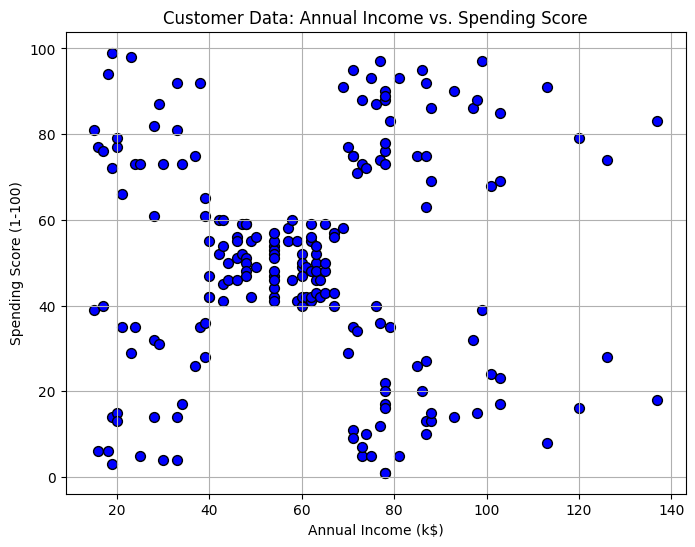

In [66]:
#Visualize the Raw Data
# Select only the 'Annual Income' and 'Spending Score' columns for visualization
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Create a scatter plot of the two features
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', s=50, edgecolor='black')
plt.title('Customer Data: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


# **K-Means Clustering with Visualization**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

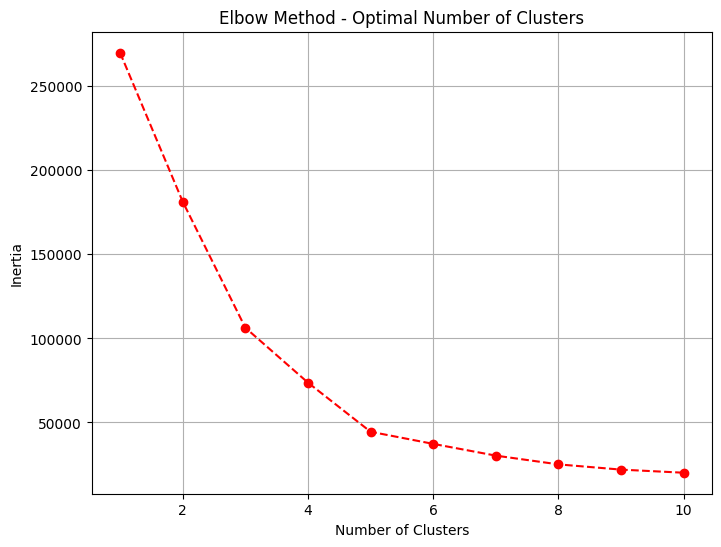

In [67]:
#Elbow Method for Optimal Clusters
# Find the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='r')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


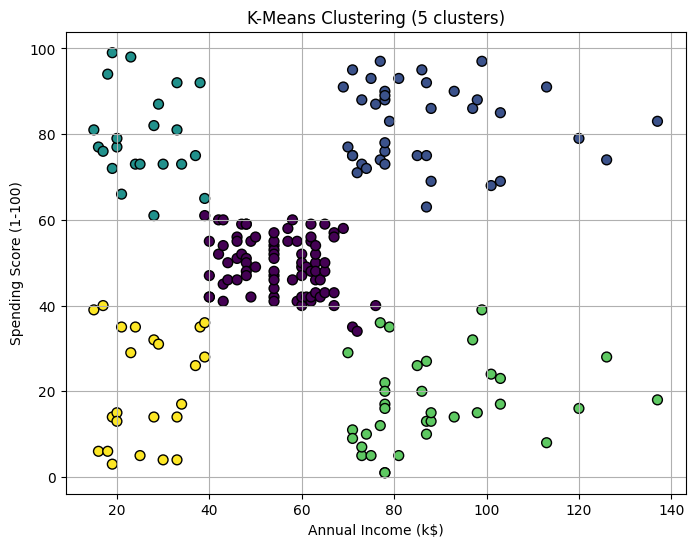

In [68]:
# Apply K-Means with Optimal Clusters
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, edgecolor='black')
plt.title('K-Means Clustering (5 clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


# **Hierarchical Clustering with Dendrogram**

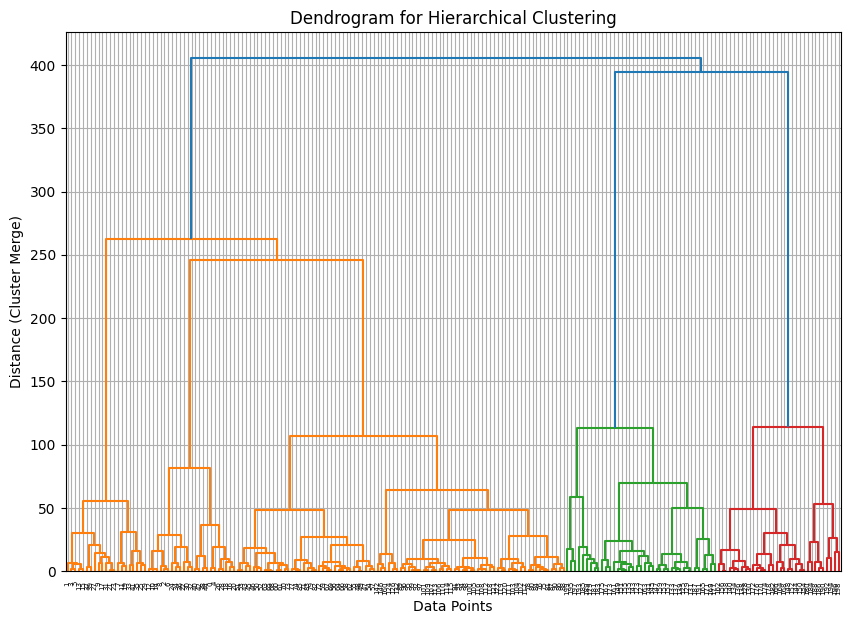

In [69]:
# Dendrogram for Hierarchical Clustering
# Create linkage matrix for Dendrogram
Z = linkage(data, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance (Cluster Merge)')
plt.grid(True)
plt.show()


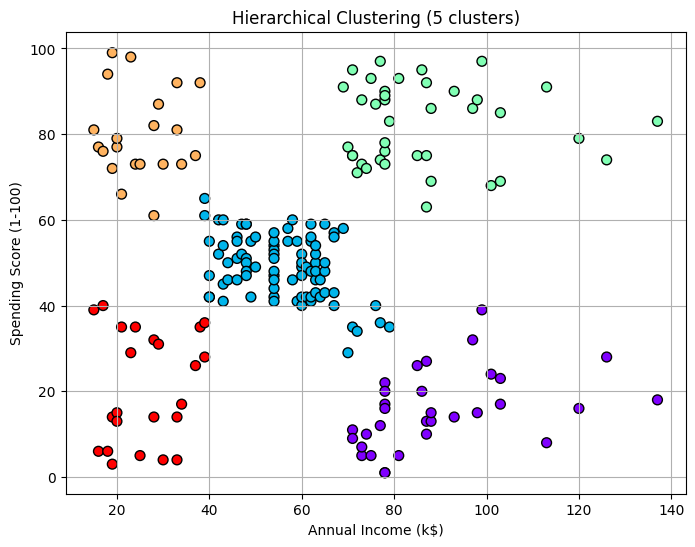

In [70]:
# Apply Hierarchical Clustering
# Apply Agglomerative Clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Labels'] = hc.fit_predict(data)

# Plot the hierarchical clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=hc.labels_, cmap='rainbow', s=50, edgecolor='black')
plt.title('Hierarchical Clustering (5 clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


# **DBSCAN Clustering with Noise**

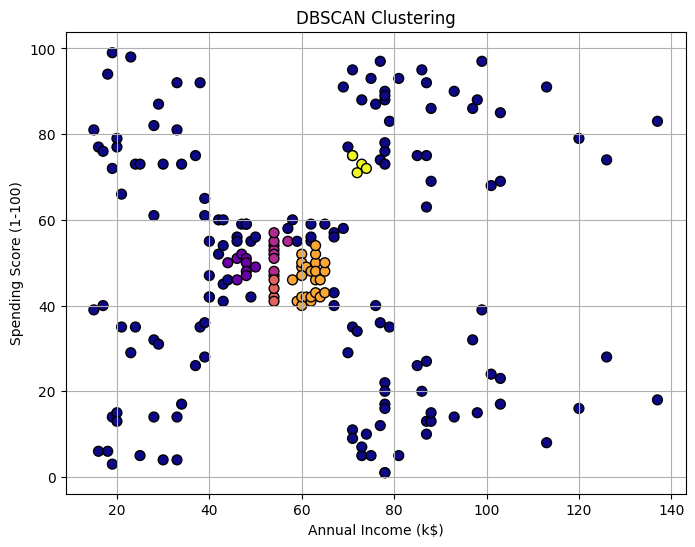

In [71]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
df['DBSCAN_Labels'] = dbscan.fit_predict(data)

# Plot DBSCAN Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='plasma', s=50, edgecolor='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


# **PCA for Dimensionality Reduction**

**Principal Component Analysis (PCA)** reduces the number of features while keeping most of the important information. We’ll reduce a high-dimensional dataset into just 2 dimensions for visualization.

 **Apply PCA to Reduce to 2 Components:**

 We’ll load a more complex dataset (like the **Wine dataset**) with many features, and then reduce it to just 2 features using PCA.

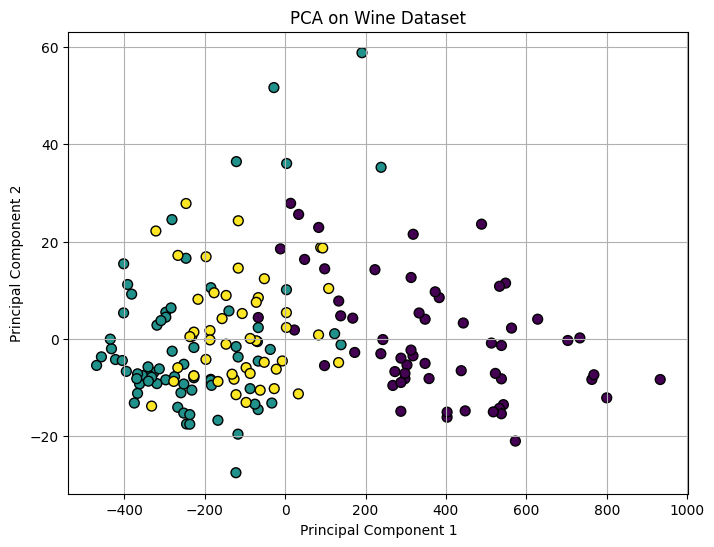

In [72]:
from sklearn.datasets import load_wine

# Load Wine dataset
wine = load_wine()
data_wine = wine.data  # Data (features)
target = wine.target   # Target (class labels)
# Standardize the data
scaler = StandardScaler()
data_wine_scaled = scaler.fit_transform(data_wine)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_wine = pca.fit_transform(data_wine)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_wine[:, 0], pca_wine[:, 1], c=target, cmap='viridis', s=50, edgecolor='black')
plt.title('PCA on Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


PCA reduces many features (like Alcohol, Malic Acid, etc. in the Wine dataset) down to just 2, while keeping as much information as possible.
The plot shows how well the PCA was able to separate the wine types using just these two new dimensions.

# **t-SNE for Dimensionality Reduction**

t-SNE is another way to reduce high-dimensional data, but it works differently from PCA. It’s especially good at visualizing clusters in the data.

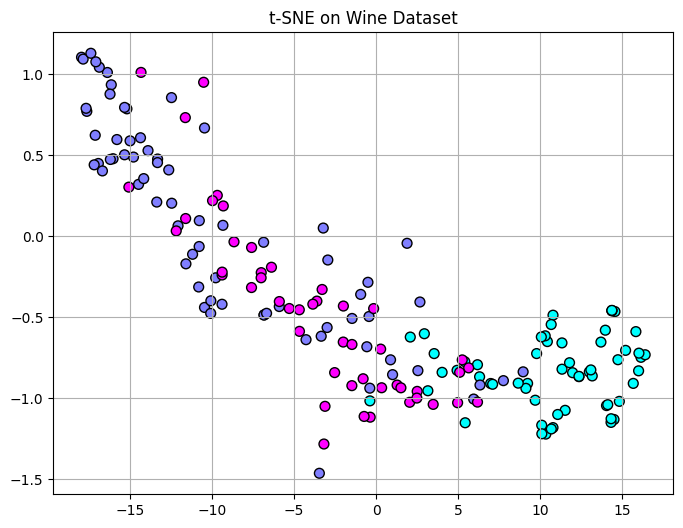

In [73]:
# Apply t-SNE to Visualize Clusters
# We’ll apply t-SNE to the wine dataset and see how it compares to PCA.
# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2)
tsne_wine = tsne.fit_transform(data_wine)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_wine[:, 0], tsne_wine[:, 1], c=target, cmap='cool', s=50, edgecolor='black')
plt.title('t-SNE on Wine Dataset')
plt.grid(True)
plt.show()



# **Visualizations for Comparing Clustering Algorithms**

Comparing K-Means, Hierarchical, and DBSCAN Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


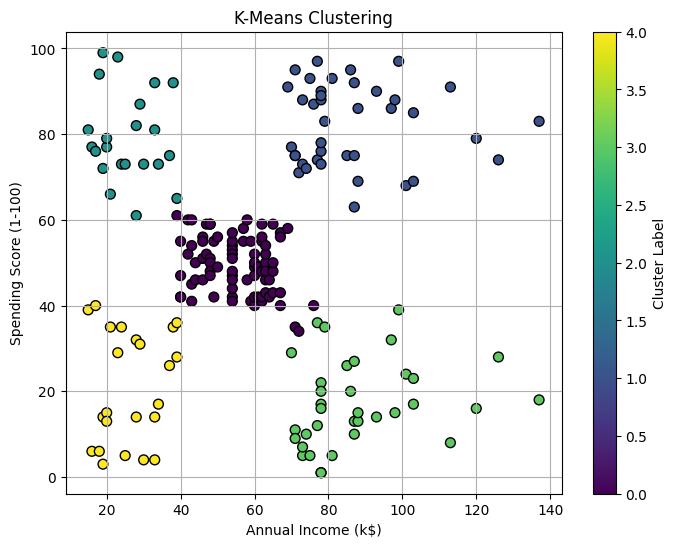

In [74]:
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(data)

# Plot K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=df['KMeans_Labels'], cmap='viridis', s=50, edgecolor='black')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


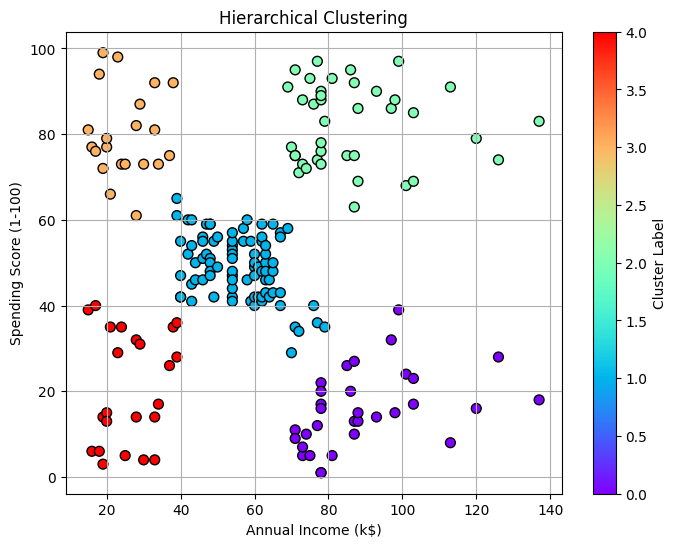

In [75]:
# Apply Agglomerative Clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Labels'] = hc.fit_predict(data)

# Plot Hierarchical clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=df['Hierarchical_Labels'], cmap='rainbow', s=50, edgecolor='black')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


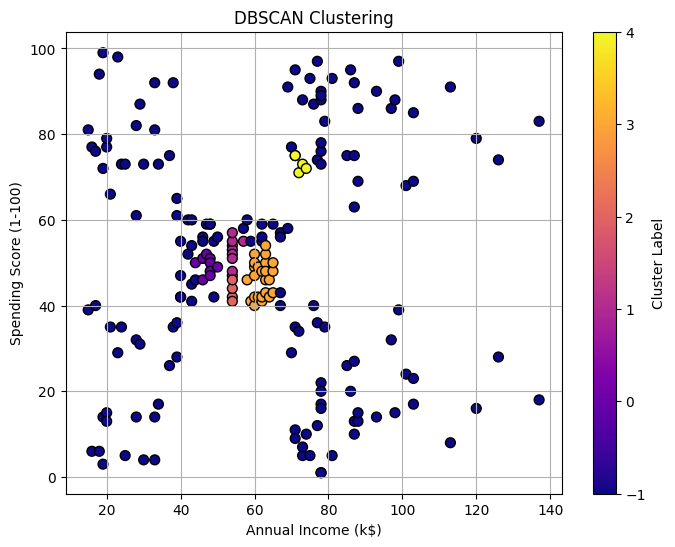

In [76]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
df['DBSCAN_Labels'] = dbscan.fit_predict(data)

# Plot DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=df['DBSCAN_Labels'], cmap='plasma', s=50, edgecolor='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


# **Comparing PCA and t-SNE for Dimensionality Reduction**

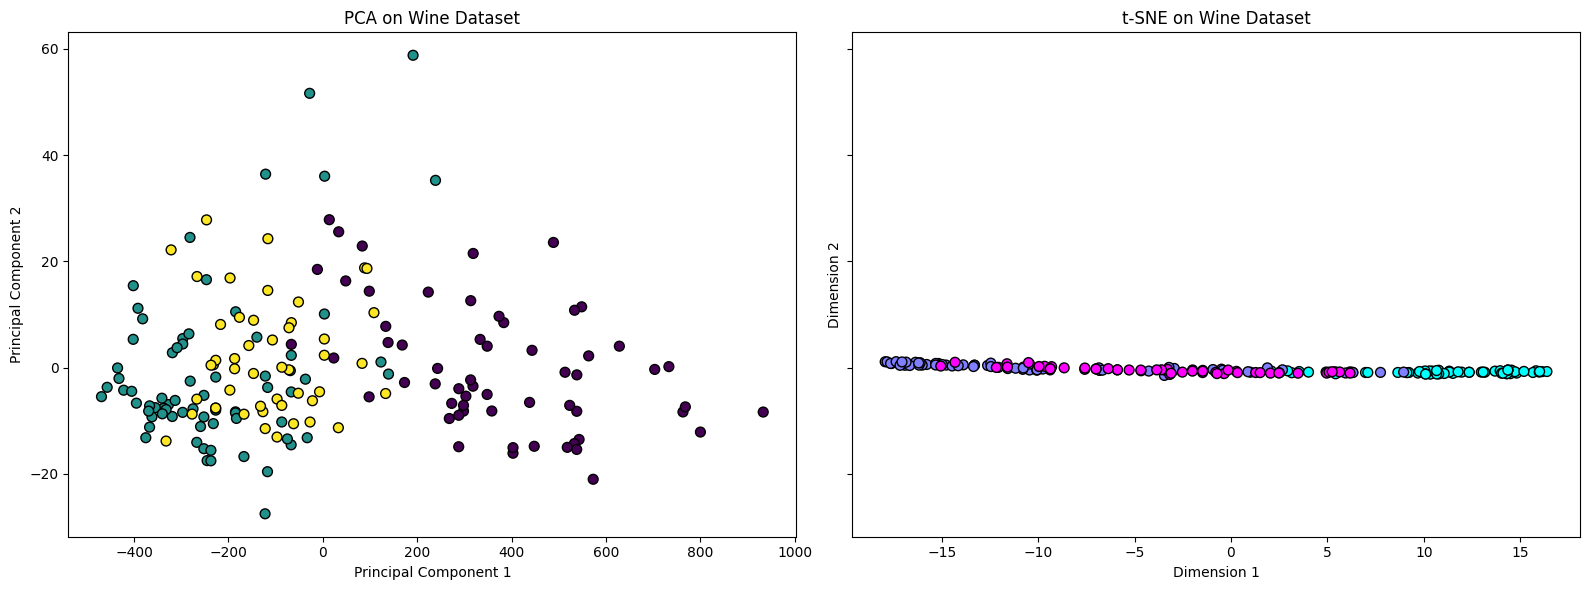

In [79]:
# Create subplots to compare PCA and t-SNE results
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# PCA Plot
axes[0].scatter(pca_wine[:, 0], pca_wine[:, 1], c=target, cmap='viridis', s=50, edgecolor='black')
axes[0].set_title('PCA on Wine Dataset')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# t-SNE Plot
axes[1].scatter(tsne_wine[:, 0], tsne_wine[:, 1], c=target, cmap='cool', s=50, edgecolor='black')
axes[1].set_title('t-SNE on Wine Dataset')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()


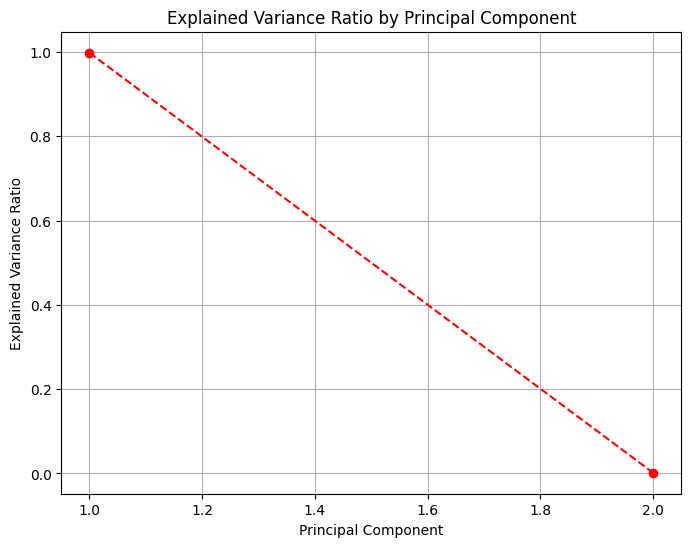

In [80]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='r')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

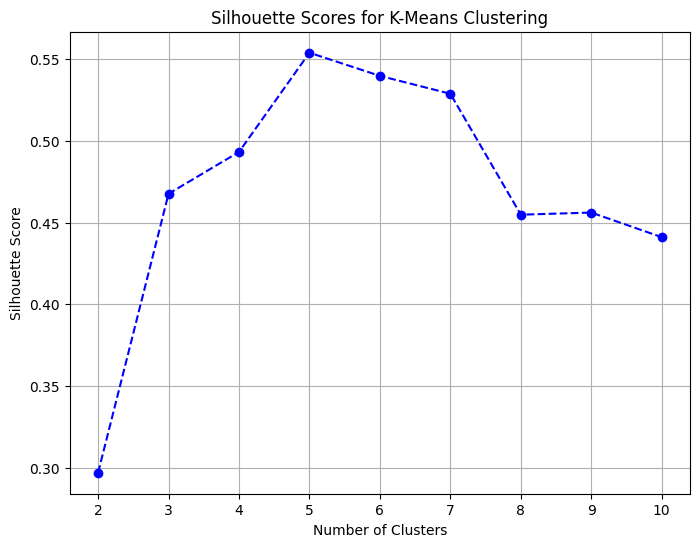

In [81]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
